In [12]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
dataset = pd.read_csv('data_processed.csv')

In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dataset.head()

,BITS ID,Campus,Program Applied,Target Discipline,Sub-Discipline,CGPA,University Selected,GRE Score : Verbal,GRE Score : Quant,GRE Score : AWA,TOEFL Score,Universities Applied,Universities Admit,Universities (Funded admit),Work experience,Duration of work experience,Relevance of PS2/Thesis to program,Internship other than PS1/PS2,Consultancy/Classes,Conference publication,rank,Other Internship
0,2015a7ts0081p,pilani,ms,computer science,artificial intelligence/ machine learning,7.93,arizonastate,154.0,170.0,4.0,105.0,"arizona state university, carnegie melon unive...",arizona state university,no,yes,1.5,no,yes,no,yes,209.0,yes
1,2012c6psc6598p,pilani,ms,computer science,NaN,6.70,arizonastate,159.0,167.0,3.5,110.0,"arizona state university, suny buffalo, suny s...","arizona state university, suny buffalo",no,yes,1.5,yes,no,no,no,209.0,no
2,2014a3ps224p,pilani,ms,mechanical engineering,robotics,7.78,arizonastate,154.0,169.0,3.5,110.0,"arizona state university, georgia tech, johns ...","u maryland, u mich",no,no,0.0,no,no,no,no,209.0,no
3,2015a3ps0270p,pilani,ms,computer science,NaN,7.98,arizonastate,148.0,169.0,4.0,103.0,"arizona state university, san jose state unive...","arizona state university, suny buffalo, u flor...",no,no,0.5,yes,no,no,no,209.0,no
4,2012b1a4761p,pilani,phd,bioengineering,tissue engineering,8.40,boston,163.0,164.0,5.0,118.0,"boston university, georgia tech, harvard unive...","boston university, u caifornia irvine, tufts u...",yes,yes,1.5,yes,yes,no,yes,81.0,yes


In [15]:
dataset.columns = dataset.columns.str.lower()

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 22 columns):
bits id                               1128 non-null object
campus                                1128 non-null object
program applied                       1128 non-null object
target discipline                     1128 non-null object
sub-discipline                        720 non-null object
cgpa                                  1128 non-null float64
university selected                   984 non-null object
gre score : verbal                    1128 non-null float64
gre score : quant                     1128 non-null float64
gre score : awa                       1128 non-null float64
toefl score                           1128 non-null float64
universities applied                  1127 non-null object
universities admit                    1109 non-null object
universities (funded admit)           1128 non-null object
work experience                       1128 non-null object
durat

In [63]:
dataset.describe()

,cgpa,gre score : verbal,gre score : quant,gre score : awa,toefl score,duration of work experience,rank,gre total
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,984.00000,1128.000000
mean,8.171043,156.597605,166.101701,3.917549,109.834419,1.175209,149.85874,322.699306
std,0.969107,5.945488,4.668714,0.584774,5.787516,1.230684,144.37010,7.958535
min,0.000000,138.000000,136.000000,2.000000,85.000000,0.000000,1.00000,275.000000
25%,7.530000,153.000000,165.000000,3.500000,107.000000,0.000000,52.00000,319.000000
50%,8.235000,157.000000,167.000000,4.000000,110.847458,0.500000,86.00000,323.000000
75%,8.900000,161.000000,169.000000,4.437500,114.000000,2.000000,207.50000,328.000000
max,10.000000,170.000000,170.000000,6.000000,120.000000,8.000000,854.00000,340.000000


Observations 
- Maximum of work duration seems like an outlier

In [23]:
l = dataset[dataset['university selected'].isna()].index 
dataset.loc[l,'success'] = 'no'
for i in dataset.index:
    if(dataset.loc[i,'success'] != 'no'):
        dataset.loc[i,'success'] = 'yes'

In [25]:
#looking for outliers in duration of work experience
l =dataset[dataset['duration of work experience'] > 10].index
dataset.loc[l,'duration of work experience'] = dataset['duration of work experience'].mean()    #imputing with average

In [26]:
#making new column for total gre score 
dataset['gre total'] = dataset['gre score : verbal'] + dataset['gre score : quant']

In [27]:
numeric_features = []
for column in dataset.columns:
     if(dataset[column].dtypes == 'float64'):
            numeric_features.append(column)

In [28]:
numeric_features

['cgpa',
 'gre score : verbal',
 'gre score : quant',
 'gre score : awa',
 'toefl score',
 'duration of work experience',
 'rank',
 'gre total']

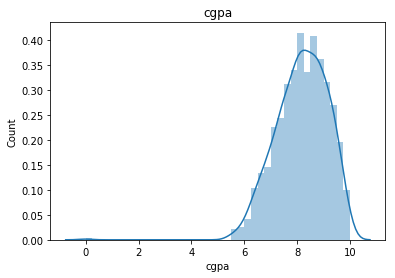

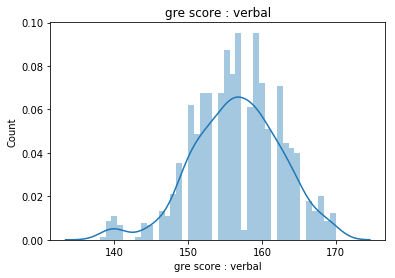

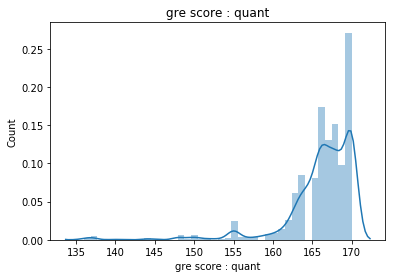

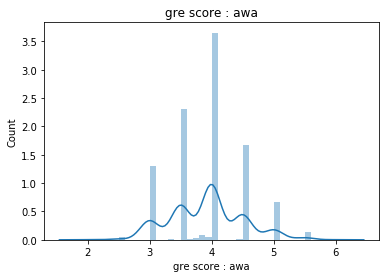

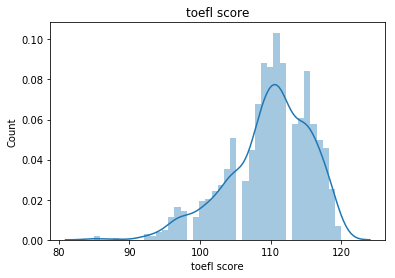

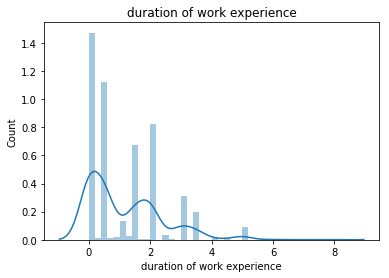

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


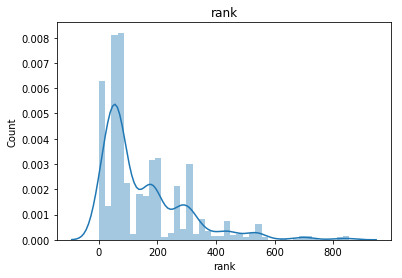

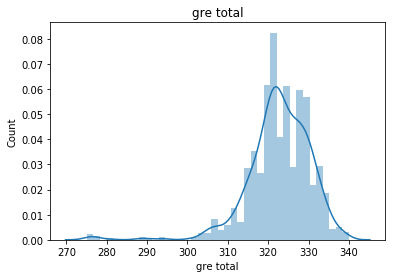

In [29]:
for feature in numeric_features:
    data=dataset.copy()
    sns.distplot(data[feature],bins=40)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()



Rank 0 correspond to unsucessful applications, Awa score values are discrete

In [30]:
dataset.columns

Index(['bits id', 'campus', 'program applied', 'target discipline',
       'sub-discipline', 'cgpa', 'university selected', 'gre score : verbal',
       'gre score : quant', 'gre score : awa', 'toefl score',
       'universities applied', 'universities admit',
       'universities (funded admit)', 'work experience',
       'duration of work experience', 'relevance of ps2/thesis to program',
       'internship other than ps1/ps2', 'consultancy/classes',
       'conference publication', 'rank', 'other internship', 'success',
       'gre total'],
      dtype='object')

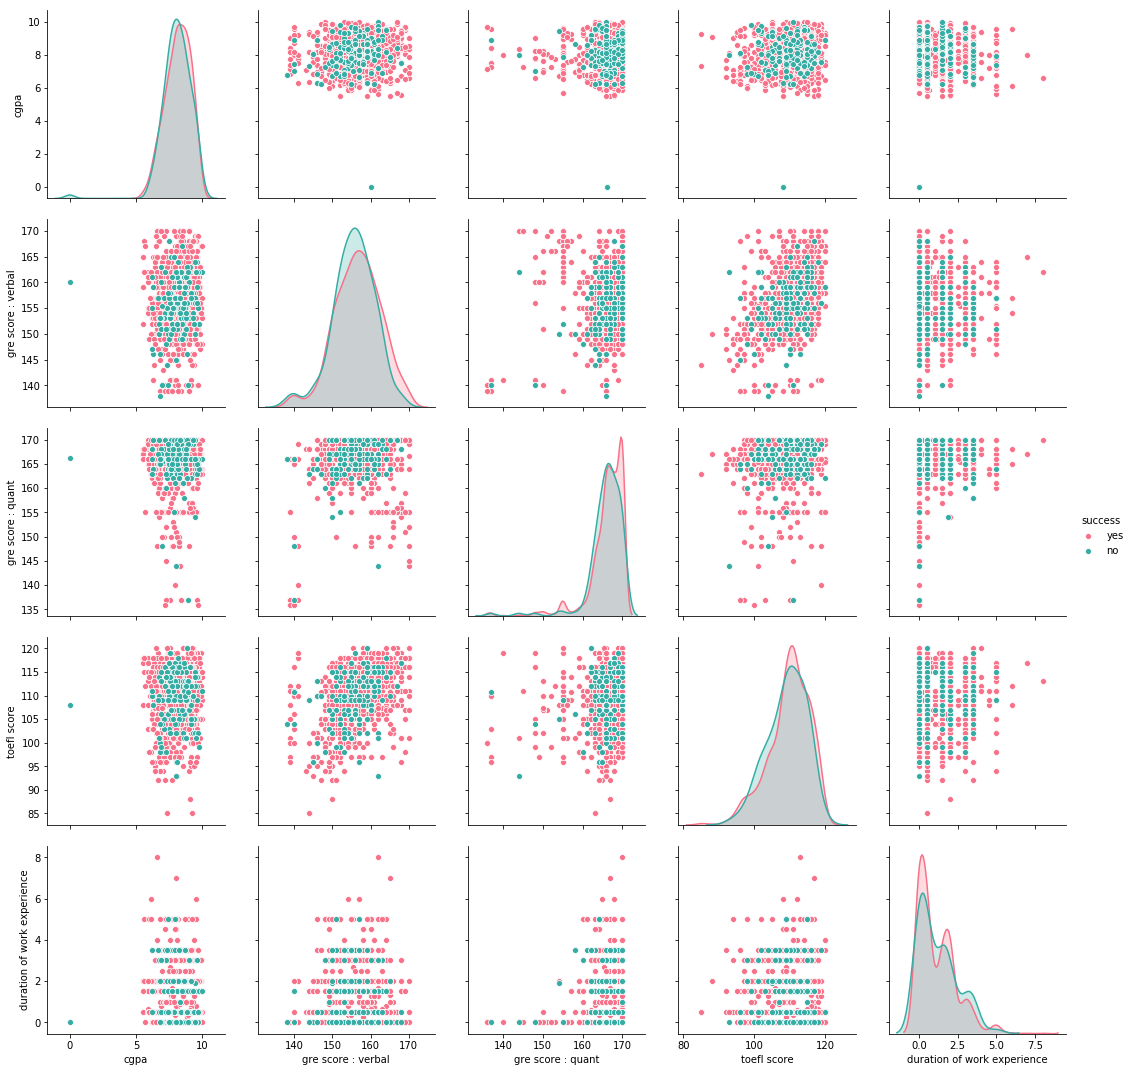

In [35]:
sns.pairplot(dataset, vars=['cgpa',
 'gre score : verbal',
 'gre score : quant',
 'toefl score',
 'duration of work experience'], hue= 'success', height=3, palette = 'husl')

Categorical features

In [36]:
categorical_features = []
for column in dataset.columns:
     if((dataset[column].dtypes == 'object') & (column != 'bits id') ):                                #excluding bits id
            categorical_features.append(column)

In [37]:
categorical_features

['campus',
 'program applied',
 'target discipline',
 'sub-discipline',
 'university selected',
 'universities applied',
 'universities admit',
 'universities (funded admit)',
 'work experience',
 'relevance of ps2/thesis to program',
 'internship other than ps1/ps2',
 'consultancy/classes',
 'conference publication',
 'other internship',
 'success']

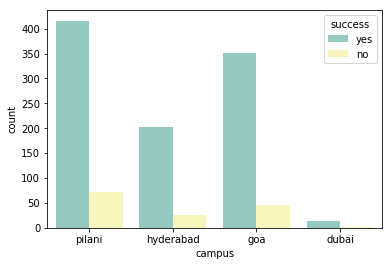

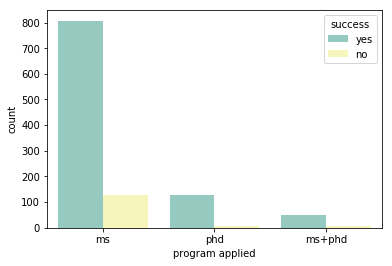

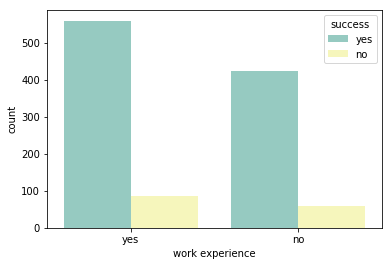

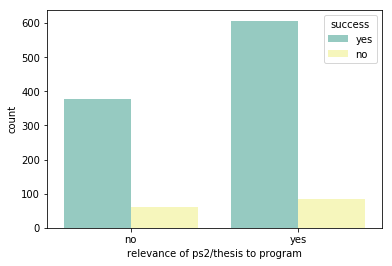

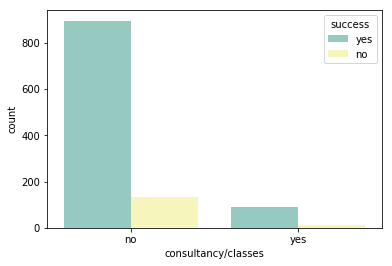

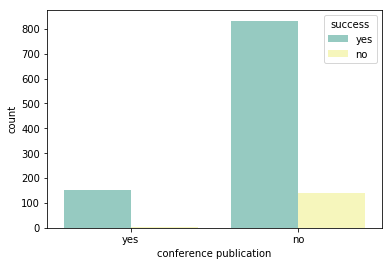

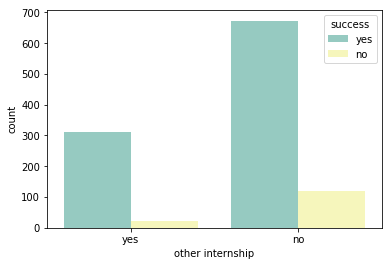

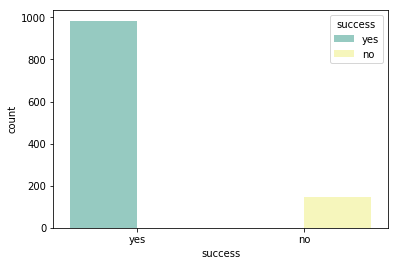

In [39]:
#Plotting features with small number of categories
for feature in categorical_features:
    if (dataset[feature].nunique()< 10):
        sns.countplot(x = feature , data = dataset, hue= dataset['success'], palette="Set3")
        plt.show()

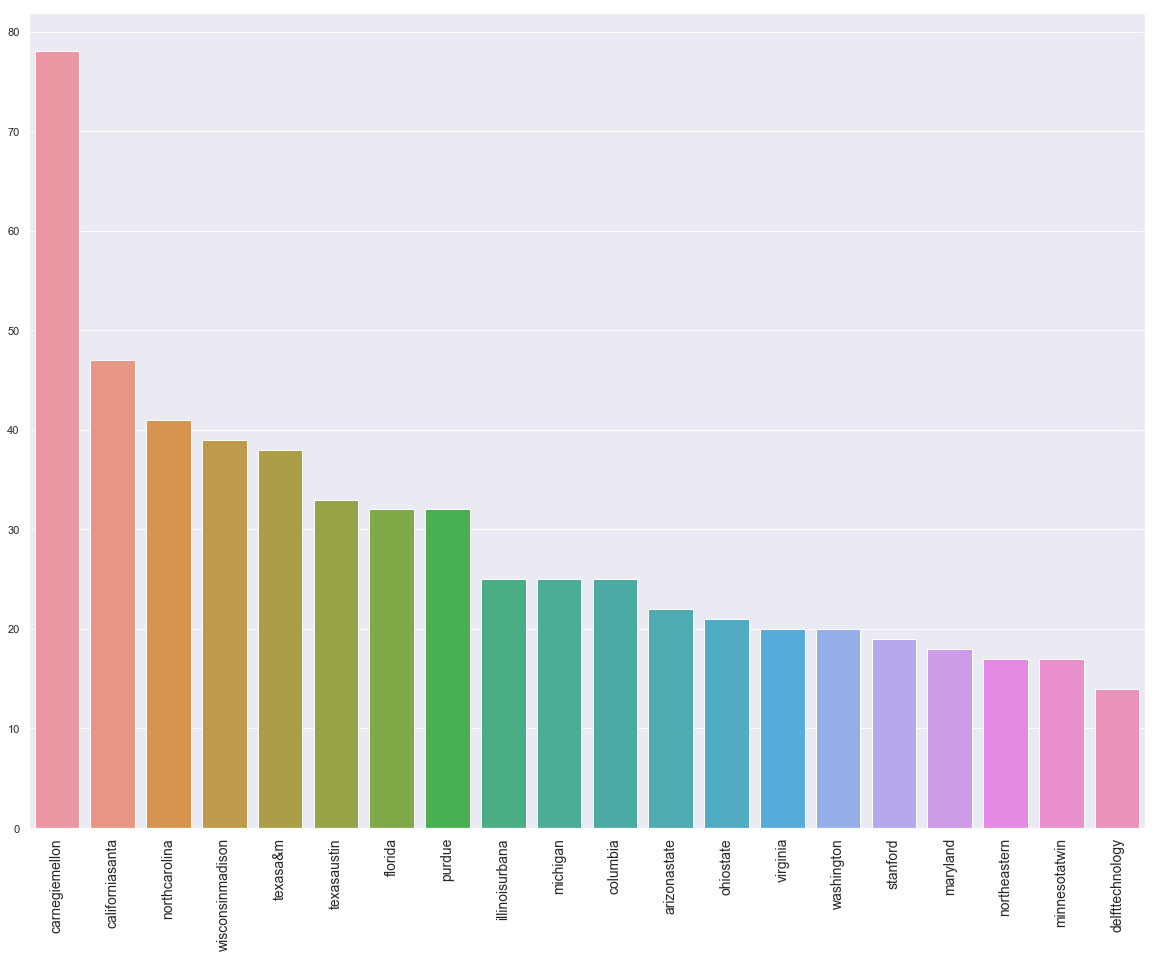

In [40]:
sns.set()
plt.figure(figsize=(20,15))
plt.xticks(fontsize=14, rotation=90)
ser = dataset['university selected'].value_counts()[1:21]                   #Plotting 20 most selected univerisities
sns.barplot(ser.index, ser.values)


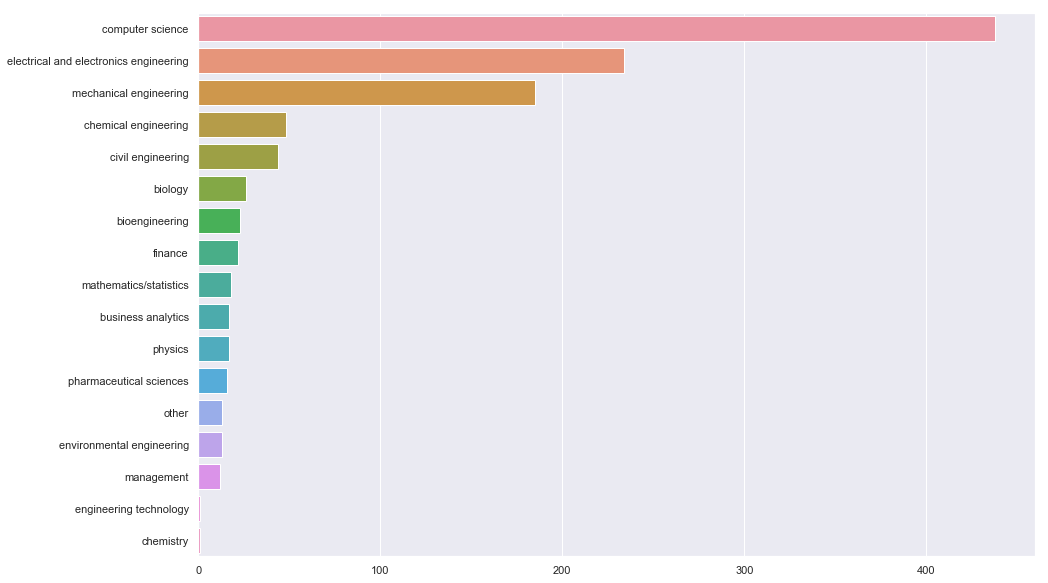

In [41]:
dataset['target discipline'].nunique()
plt.figure(figsize=(15,10))
ser = dataset['target discipline'].value_counts()
sns.barplot(ser.values, ser.index, orient = 'h')

As there are a lot of universities selected for classification, making groups based on range of ranks 

Binning university selected variable based on ranks 

In [42]:
bin_labels_5 = ['excellent', 'very_good', 'good', 'average', 'below average']
dataset['rank_segmented'] = pd.qcut(dataset[dataset['rank']!=0]['rank'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5 )

In [48]:
categories = ['excellent', 'very_good', 'good', 'average', 'below average', 'notselected']
dataset['rank_segmented']= pd.Categorical(dataset['rank_segmented'], categories=categories, ordered=True)
l = dataset[dataset['rank'].isnull()].index
dataset.loc[l,'rank_segmented'] = 'notselected'

In [50]:
dataset['rank_segmented'].value_counts()

excellent        240
very_good        231
average          224
below average    170
notselected      144
good             119
Name: rank_segmented, dtype: int64

In [51]:
lis = []
for rank in dataset['rank_segmented'].unique():
    lis.append([rank , dataset[dataset['rank_segmented'] == rank]['university selected'].unique()])
df_uni = pd.DataFrame(lis)
df_uni.columns = ['rank','universities']
df_uni.set_index('rank', inplace= True)


In [52]:
lis

[['average',
  array(['arizonastate', 'michiganstate', 'northcarolina', 'texasa&m',
         'twente', 'coloradoboulder', 'florida', 'californiairvine',
         'minnesotatwin', 'illinoischicago', 'massachusettsamherst',
         'notredame', 'virginia', 'waterloo', 'ntnunorway', 'stockholm',
         'casewestern', 'rochester', 'western', 'collegedublin', 'hamburg',
         'curtin', 'freiburg', 'barcelona'], dtype=object)],
 ['good',
  array(['boston', 'leuven', 'ohiostate', 'pennsylvaniastate', 'purdue',
         'rwthaachen', 'californiadavis', 'maryland', 'alberta',
         'southerncalifornia', 'zurich', 'rice', 'technicalberlin',
         'chalmers', 'essec', 'queenmary'], dtype=object)],
 ['excellent',
  array(['carnegiemellon', 'columbia', 'cornell', 'duke', 'harvard',
         'imperialcollege', 'johnshopkins', 'nationalsingapore', 'oxford',
         'stanford', 'californialos', 'californiaberkeley', 'chicago',
         'michigan', 'pennsylvania', 'toronto', 'unsw', 'edinb

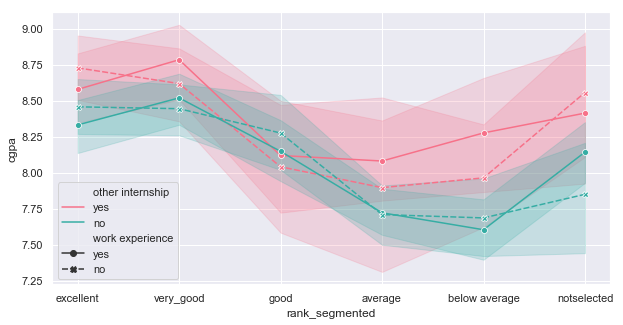

In [56]:
plt.figure(figsize=(10,5))
sns.lineplot(x=dataset['rank_segmented'], y = dataset['cgpa'], style = dataset['work experience'], hue = dataset['other internship'], palette = 'husl',markers =True )


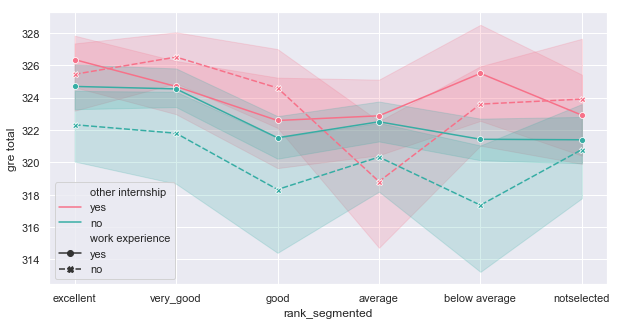

In [54]:
plt.figure(figsize=(10,5))
sns.lineplot(x=dataset['rank_segmented'], y = dataset['gre total'], style = dataset['work experience'], hue = dataset['other internship'], palette = 'husl' ,markers =True )

In [62]:
dataset.columns

Index(['bits id', 'campus', 'program applied', 'target discipline',
       'sub-discipline', 'cgpa', 'university selected', 'gre score : verbal',
       'gre score : quant', 'gre score : awa', 'toefl score',
       'universities applied', 'universities admit',
       'universities (funded admit)', 'work experience',
       'duration of work experience', 'relevance of ps2/thesis to program',
       'internship other than ps1/ps2', 'consultancy/classes',
       'conference publication', 'rank', 'other internship', 'success',
       'gre total', 'rank_segmented'],
      dtype='object')

In [58]:
dataset.to_csv('after_eda.csv' , index= False)

In [59]:
data = pd.read_csv('after_eda.csv')


,bits id,campus,program applied,target discipline,sub-discipline,cgpa,university selected,gre score : verbal,gre score : quant,gre score : awa,toefl score,universities applied,universities admit,universities (funded admit),work experience,duration of work experience,relevance of ps2/thesis to program,internship other than ps1/ps2,consultancy/classes,conference publication,rank,other internship,success,gre total,rank_segmented
0,2015a7ts0081p,pilani,ms,computer science,artificial intelligence/ machine learning,7.930,arizonastate,154.000000,170.000000,4.000000,105.000000,"arizona state university, carnegie melon unive...",arizona state university,no,yes,1.500000,no,yes,no,yes,209.0,yes,yes,324.000000,average
1,2012c6psc6598p,pilani,ms,computer science,NaN,6.700,arizonastate,159.000000,167.000000,3.500000,110.000000,"arizona state university, suny buffalo, suny s...","arizona state university, suny buffalo",no,yes,1.500000,yes,no,no,no,209.0,no,yes,326.000000,average
2,2014a3ps224p,pilani,ms,mechanical engineering,robotics,7.780,arizonastate,154.000000,169.000000,3.500000,110.000000,"arizona state university, georgia tech, johns ...","u maryland, u mich",no,no,0.000000,no,no,no,no,209.0,no,yes,323.000000,average
3,2015a3ps0270p,pilani,ms,computer science,NaN,7.980,arizonastate,148.000000,169.000000,4.000000,103.000000,"arizona state university, san jose state unive...","arizona state university, suny buffalo, u flor...",no,no,0.500000,yes,no,no,no,209.0,no,yes,317.000000,average
4,2012b1a4761p,pilani,phd,bioengineering,tissue engineering,8.400,boston,163.000000,164.000000,5.000000,118.000000,"boston university, georgia tech, harvard unive...","boston university, u caifornia irvine, tufts u...",yes,yes,1.500000,yes,yes,no,yes,81.0,yes,yes,327.000000,good
5,2012b1a4786p,pilani,ms+phd,bioengineering,NaN,7.460,boston,155.000000,163.000000,4.000000,116.000000,"boston university, carnegie melon university, ...","boston university, tamu, tufts university, uc ...",no,yes,2.000000,yes,no,no,yes,81.0,no,yes,318.000000,good
6,2011a7ts074p,pilani,phd,computer science,artificial intelligence/ machine learning,8.540,carnegiemellon,170.000000,169.000000,5.000000,120.000000,"carnegie melon university, johns hopkins unive...","cmu, johns hopkins university",yes,no,0.500000,no,no,yes,no,47.0,no,yes,339.000000,excellent
7,2015a2ts0550h,hyderabad,ms,civil engineering,transportation engineering,9.030,carnegiemellon,151.000000,169.000000,2.500000,103.000000,"carnegie melon university, tu delft, u mich, u...","cmu, tu delft, u mich",yes,no,0.000000,yes,yes,yes,no,47.0,yes,yes,320.000000,excellent
8,2007b2a4655g,goa,ms,finance,public policy,6.310,carnegiemellon,165.000000,167.000000,4.500000,114.000000,"carnegie melon university, u chicago","cmu, u chicago",yes,yes,2.000000,no,no,no,no,47.0,no,yes,332.000000,excellent
9,2012a3ps259h,hyderabad,ms,mechanical engineering,robotics,8.460,carnegiemellon,151.000000,167.000000,3.000000,102.000000,"carnegie melon university, tamu, u california ...","cmu, u penn, u washington seattle",no,no,0.000000,yes,no,no,no,47.0,no,yes,318.000000,excellent
